In [1]:
%matplotlib inline
import sys
import os
import random
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/simulations_v2")
from load_params import load_multigroup_params, load_params
from dynamic_population_sim import DynamicPopulationSim
from multi_group_simulation_dynamic_population import MultiGroupSimulationDynamicPopulation
import pandas as pd

from math import sqrt
from analysis_helpers import binomial_exit_function
import gc
gc.collect()
import multiprocessing as mp
mp.cpu_count()

8

In [2]:

movein_selfiso_params = load_params('../src/simulations_v2/params/quarantine_analysis/oct12quarantine/ug_self_iso.yaml')[1]



g1_base_params_free  = load_params('../src/simulations_v2/params/jan4calibration/group_1_students_pre_semester_private.yaml')[1]
g1_base_params_post_movein = load_params('../src/simulations_v2/params/jan4calibration/group_1_students_post_movein_private.yaml')[1]

g2_base_params_free  = load_params('../src/simulations_v2/params/jan4calibration/group_2_students_pre_semester_private.yaml')[1]
g2_base_params_post_movein = load_params('../src/simulations_v2/params/jan4calibration/group_2_students_post_movein_private.yaml')[1]


g3_base_params_free  = load_params('../src/simulations_v2/params/jan4calibration/group_3_students_pre_semester_private.yaml')[1]
g3_base_params_post_movein = load_params('../src/simulations_v2/params/jan4calibration/group_3_students_post_movein_private.yaml')[1]

#Load Actuals

actuals1 = pd.read_csv('../src/simulations_v2/params/jan4calibration/actual_counts_group_1.csv')
actuals2 = pd.read_csv('../src/simulations_v2/params/jan4calibration/actual_counts_group_2.csv')
actuals3 = pd.read_csv('../src/simulations_v2/params/jan4calibration/actual_counts_group_3.csv')


actual_counts1 = actuals1['cum_case_count']
actual_counts2 = actuals2['cum_case_count']
actual_counts3 = actuals3['cum_case_count']


g1_movein_contact_matrix = np.matrix([
    [g1_base_params_free['expected_contacts_per_day'], 0],
    [0, 0]])

g2_movein_contact_matrix = np.matrix(
   [ [g2_base_params_free['expected_contacts_per_day'], 0],
    [0, 0]])

g3_movein_contact_matrix = np.matrix(
   [ [g3_base_params_free['expected_contacts_per_day'], 0],
    [0, 0]])

C:\Users\briliu\Desktop\group-testing/src/simulations_v2\load_params.py:136: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  params = yaml.load(f)
C:\Users\briliu\Desktop\group-testing/src/simulations_v2\load_params.py:45: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  age_sev_params = yaml.load(f)


In [3]:
g1_base_params_post_movein

{'severity_prevalence': array([0.47808584, 0.50907724, 0.00940271, 0.00343422]),
 'max_time_exposed': 7,
 'exposed_time_function': <function analysis_helpers.poisson_waiting_function.<locals>.<lambda>(n)>,
 'max_time_ID': 8,
 'ID_time_function': <function analysis_helpers.poisson_waiting_function.<locals>.<lambda>(n)>,
 'max_time_SyID_mild': 20,
 'SyID_mild_time_function': <function analysis_helpers.poisson_waiting_function.<locals>.<lambda>(n)>,
 'max_time_SyID_severe': 20,
 'SyID_severe_time_function': <function analysis_helpers.poisson_waiting_function.<locals>.<lambda>(n)>,
 'mild_symptoms_daily_self_report_p': 0,
 'cases_isolated_per_contact': 1.329,
 'cases_quarantined_per_contact': 3.304,
 'contact_trace_testing_frac': 1,
 'contact_tracing_delay': 1,
 'sample_QI_exit_function': <function analysis_helpers.binomial_exit_function.<locals>.<lambda>(n)>,
 'sample_QS_exit_function': <function analysis_helpers.binomial_exit_function.<locals>.<lambda>(n)>,
 'daily_outside_infection_p': 

In [4]:

def sample_movein_trajectory(transmission_p):
    
    movein_time_horizon = 18

    init_pop_count = 513
    avg_init_cases = 5.77
    new_population_counts = [int(count) for count in """108
    141
    90
    87
    88
    71
    126
    539
    469
    124
    304
    76
    211
    105
    231
    99
    102
    49""".split('\n')]

    infxn_prob = avg_init_cases / (sum(new_population_counts) + init_pop_count)



    g1_free_group_population_dynamics = {}
    movein_time_horizon = 18 # 8/16 through 9/2
    new_case_exposed_rate = 1
    for t in range(movein_time_horizon):
        new_pop = new_population_counts[t]
        new_cases = np.random.binomial(new_pop, infxn_prob)
        new_exposed = np.random.binomial(new_cases, new_case_exposed_rate)
        g1_free_group_population_dynamics[t] = {'S': new_pop - new_exposed, 'E': new_exposed, 'ID': new_cases- new_exposed}



    init_pop_count = 1222
    avg_init_cases = 3.37
    new_population_counts = [int(count) for count in """259
    337
    216
    207
    210
    169
    300
    1287
    1119
    295
    727
    182
    504
    251
    552
    237
    244
    116""".split('\n')]

    infxn_prob = avg_init_cases / (sum(new_population_counts) + init_pop_count)



    g2_free_group_population_dynamics = {}
    movein_time_horizon = 18 # 8/16 through 9/2
    new_case_exposed_rate = 1
    for t in range(movein_time_horizon):
        new_pop = new_population_counts[t]
        new_cases = np.random.binomial(new_pop, infxn_prob)
        new_exposed = np.random.binomial(new_cases, new_case_exposed_rate)
        g2_free_group_population_dynamics[t] = {'S': new_pop - new_exposed, 'E': new_exposed, 'ID': new_cases- new_exposed}


    init_pop_count = 5281
    avg_init_cases = 0
    new_population_counts = [int(count) for count in """42
    64
    39
    58
    101
    57
    60
    59
    51
    43
    41
    30
    24
    42
    40
    47
    34
    89""".split('\n')]

    infxn_prob = avg_init_cases / (sum(new_population_counts) + init_pop_count)



    g3_free_group_population_dynamics = {}
    movein_time_horizon = 18 # 8/16 through 9/2
    new_case_exposed_rate = 1
    for t in range(movein_time_horizon):
        new_pop = new_population_counts[t]
        new_cases = np.random.binomial(new_pop, infxn_prob)
        new_exposed = np.random.binomial(new_cases, new_case_exposed_rate)
        g3_free_group_population_dynamics[t] = {'S': new_pop - new_exposed, 'E': new_exposed, 'ID': new_cases- new_exposed}
    
    
    
    g1_base_params_free['exposed_infection_p'] = transmission_p
    g1_base_params_post_movein['exposed_infection_p'] = transmission_p
    g2_base_params_free['exposed_infection_p'] = transmission_p
    g2_base_params_post_movein['exposed_infection_p'] = transmission_p
    g3_base_params_free['exposed_infection_p'] = transmission_p
    g3_base_params_post_movein['exposed_infection_p'] = transmission_p
    
    
    g1_base_params_free['sample_QI_exit_function'] = binomial_exit_function(0)
    g1_base_params_post_movein['sample_QI_exit_function'] = binomial_exit_function(0)

    g2_base_params_free['sample_QI_exit_function'] = binomial_exit_function(0)
    g2_base_params_post_movein['sample_QI_exit_function'] = binomial_exit_function(0)

    g3_base_params_free['sample_QI_exit_function'] = binomial_exit_function(0)
    g3_base_params_post_movein['sample_QI_exit_function'] = binomial_exit_function(0)

    
    dynamic_pop_sim1 = DynamicPopulationSim(
        g1_base_params_free,
        movein_selfiso_params,
        g1_base_params_post_movein,
        g1_movein_contact_matrix,
        movein_time_horizon,
        g1_free_group_population_dynamics,
        {}
    )

    dynamic_pop_sim2 = DynamicPopulationSim(
        g2_base_params_free,
        movein_selfiso_params,
        g2_base_params_post_movein,
        g2_movein_contact_matrix,
        movein_time_horizon,
        g2_free_group_population_dynamics,
        {}
    )

    dynamic_pop_sim3 = DynamicPopulationSim(
        g3_base_params_free,
        movein_selfiso_params,
        g3_base_params_post_movein,
        g3_movein_contact_matrix,
        movein_time_horizon,
        g3_free_group_population_dynamics,
        {}
    )
    
    
    contact_matrix = np.matrix([[0.736, 0.023, 0],[.028, .148, 0], [0, 0.023, .067]])
    
    
    multigroup_sim = MultiGroupSimulationDynamicPopulation([dynamic_pop_sim1, dynamic_pop_sim2,dynamic_pop_sim3], contact_matrix)
    for _ in range(0,len(actual_counts1)-1):
        multigroup_sim.step()

    movein_df = dynamic_pop_sim1.movein_sim.sims[0].sim_df
    post_movein_df = dynamic_pop_sim1.post_movein_sim.sim_df
    post_movein_df.index = range(movein_df.shape[0]-1, post_movein_df.shape[0] + movein_df.shape[0] -1)
    df = pd.concat([movein_df, post_movein_df[1:]])
    r1 = list(df['QI'])
    
    movein_df = dynamic_pop_sim2.movein_sim.sims[0].sim_df
    post_movein_df = dynamic_pop_sim2.post_movein_sim.sim_df
    post_movein_df.index = range(movein_df.shape[0]-1, post_movein_df.shape[0] + movein_df.shape[0] -1)
    df = pd.concat([movein_df, post_movein_df[1:]])
    r2 = list(df['QI'])
    
    movein_df = dynamic_pop_sim3.movein_sim.sims[0].sim_df
    post_movein_df = dynamic_pop_sim3.post_movein_sim.sim_df
    post_movein_df.index = range(movein_df.shape[0]-1, post_movein_df.shape[0] + movein_df.shape[0] -1)
    df = pd.concat([movein_df, post_movein_df[1:]])
    r3 = list(df['QI'])
    
    return [r1,r2,r3]

def sample_trajectories(transmission_p, ntrajectories):
    print(transmission_p)
    g1_trajectories = []
    g2_trajectories = []
    g3_trajectories = []
    for _ in range(ntrajectories):
        t =sample_movein_trajectory(transmission_p)
        g1_trajectories.append(t[0])
        g2_trajectories.append(t[1])
        g3_trajectories.append(t[2])
    return [g1_trajectories,g2_trajectories,g3_trajectories]


def score_trajectories_average(list_of_trajectories):
    g1_trajectories_avg = np.mean(list_of_trajectories[0],axis = 0)
    g2_trajectories_avg = np.mean(list_of_trajectories[1],axis = 0)
    g3_trajectories_avg = np.mean(list_of_trajectories[2],axis = 0)
    
    sum_of_squares = 0
    for i in range(0,len(g1_trajectories_avg)):
        sum_of_squares = sum_of_squares + (g1_trajectories_avg[i]-actual_counts1[i])**2
        sum_of_squares = sum_of_squares + (g2_trajectories_avg[i]-actual_counts2[i])**2
        sum_of_squares = sum_of_squares + (g3_trajectories_avg[i]-actual_counts3[i])**2
    
    return np.log( np.sqrt( sum_of_squares/ len(g1_trajectories_avg) ) )
    

  


In [5]:
import multiprocessing as mp
import gc
from joblib import Parallel, delayed
import multiprocessing

inputs = np.arange(0.2,.6,.005)
def processInput(i):
    gc.collect()
    trajectories = sample_trajectories(i,400)
    score = score_trajectories_average(trajectories)
    return score

num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)

In [6]:
inputs

array([0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 , 0.235, 0.24 ,
       0.245, 0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275, 0.28 , 0.285,
       0.29 , 0.295, 0.3  , 0.305, 0.31 , 0.315, 0.32 , 0.325, 0.33 ,
       0.335, 0.34 , 0.345, 0.35 , 0.355, 0.36 , 0.365, 0.37 , 0.375,
       0.38 , 0.385, 0.39 , 0.395, 0.4  , 0.405, 0.41 , 0.415, 0.42 ,
       0.425, 0.43 , 0.435, 0.44 , 0.445, 0.45 , 0.455, 0.46 , 0.465,
       0.47 , 0.475, 0.48 , 0.485, 0.49 , 0.495, 0.5  , 0.505, 0.51 ,
       0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 , 0.545, 0.55 , 0.555,
       0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585, 0.59 , 0.595])

In [7]:
results

[4.1524536367132425,
 4.15876400991234,
 4.151834641628936,
 4.139759010208989,
 4.130583674885121,
 4.134875142276065,
 4.1133962387575025,
 4.114204751674659,
 4.090131385509068,
 4.093857706828527,
 4.089754913776329,
 4.076762340675975,
 4.066192560122417,
 4.067500758788521,
 4.0555256904006365,
 4.050010983482642,
 4.027705272990799,
 4.00238547602517,
 3.9917659570019293,
 3.9999451042819194,
 3.9942300267022763,
 3.949673828398599,
 3.9492018507202857,
 3.9568915259432345,
 3.9183047267867983,
 3.89687019422159,
 3.8945068514376096,
 3.877946776207889,
 3.852107307297482,
 3.830425636412111,
 3.8154818749527006,
 3.775346243266624,
 3.7513050416661224,
 3.750842449622265,
 3.7058380198856793,
 3.6981673301863083,
 3.6178011664133622,
 3.6201422999682293,
 3.6215685328415277,
 3.532818229641129,
 3.5528136315912553,
 3.536007116233218,
 3.451694811909951,
 3.434233390879645,
 3.3401990217409026,
 3.2077613247557144,
 3.3357660532742988,
 3.226319837304328,
 3.222571173483879,
 3

In [8]:
non_log = []
for i in results:
    non_log.append(np.exp(i))

In [9]:
non_log

[63.58983539329641,
 63.9923797530643,
 63.55048577764183,
 62.78768843391006,
 62.21422522012231,
 62.48178924942376,
 61.154059065289275,
 61.20352290536243,
 59.74774117587053,
 59.97079578607697,
 59.72525207374409,
 58.95428662802487,
 58.3344343776334,
 58.41079734494961,
 57.71549550466505,
 57.39808747288151,
 56.13195582985377,
 54.72854807993832,
 54.15043231122513,
 54.59515291075764,
 54.28402727680228,
 51.91842975540888,
 51.89393119731233,
 52.29451688726813,
 50.31507463740192,
 49.24807074800992,
 49.131818101918455,
 48.32489132268183,
 47.092196472073326,
 46.08214830080435,
 45.39862757444946,
 43.6126062730516,
 42.576610009063195,
 42.556918962830395,
 40.68412714267552,
 40.373245689594675,
 37.25555891889035,
 37.34288133481587,
 37.39617897815019,
 34.22027243256417,
 34.911407267021794,
 34.329571178533236,
 31.553824815035043,
 31.00763271772654,
 28.224743484044264,
 24.723675943634305,
 28.09990100203661,
 25.18679469936027,
 25.092554620862938,
 23.2754061

In [14]:
students_to_plot = pd.DataFrame(np.column_stack((inputs,non_log)), columns = ['inputs','RMSE'])
students_to_plot.to_csv('students_to_plot.csv')

Text(0, 0.5, ' RMSE')

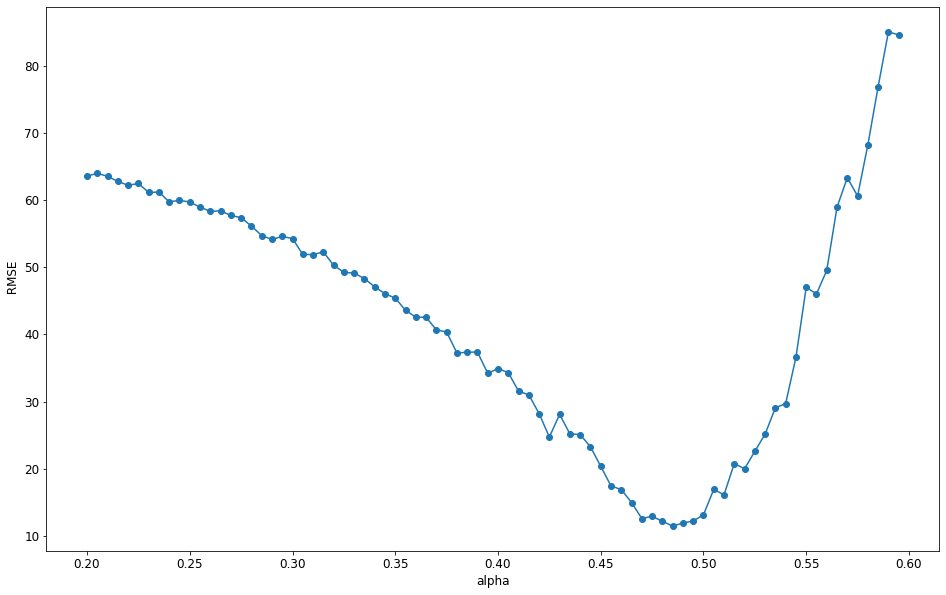

In [10]:

plt.figure(figsize = (16,10))



plt.plot(inputs,non_log)
plt.scatter(inputs,non_log )

plt.xlabel('alpha')
plt.ylabel(' RMSE')

In [15]:
pd.DataFrame(np.column_stack((inputs,non_log)),columns = ['alpha','score']).sort_values('score',ascending = True)

,alpha,score
57,0.485,11.463396
58,0.490,11.916088
56,0.480,12.176163
59,0.495,12.230833
54,0.470,12.588380
...,...,...
1,0.205,63.992380
76,0.580,68.218467
77,0.585,76.889550
79,0.595,84.618470


# Plotting Function

In [17]:
trajectories = sample_trajectories(0.485,100)

0.485


In [27]:
len(trajectories)

3

In [19]:
import pickle
pickle.dump( trajectories, open( "group_trajectories.p", "wb" ) )
pickle.dump( actual_counts1, open( "actuals.p", "wb" ) )

In [28]:
import pickle
pickle.dump( trajectories, open( "group_trajectories.p", "wb" ) )
pickle.dump( actual_counts1, open( "actuals.p", "wb" ) )
def plot_trajectories(trajs,actual_counts, title):
    plt.figure(figsize=(10,6))
    label='Simulated Case Counts'
    for t in trajs:
        plt.plot(range(len(t)), t, color='blue', alpha=0.5, label=label)
        label=None
    plt.plot(range(len(actual_counts)), actual_counts, color='red', linewidth=3, 
             alpha=0.7, label='Observed Case Counts')
    plt.legend(loc='best')
    plt.xlabel('Day since 8/16')
    plt.ylabel('Cumulative Counts')
    plt.title(title)
    plt.show()

Text(0.5, 1.0, 'Student Case Counts')

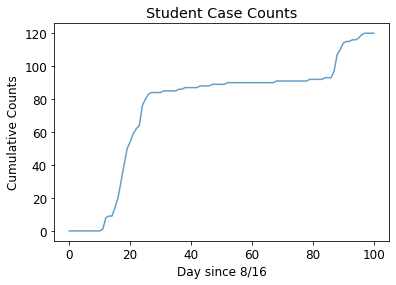

In [8]:
plt.plot(range(len(actual_counts1)), actual_counts1, 
             alpha=0.7, label='Observed Case Counts')
plt.xlabel('Day since 8/16')
plt.ylabel('Cumulative Counts')
plt.title('Student Case Counts')

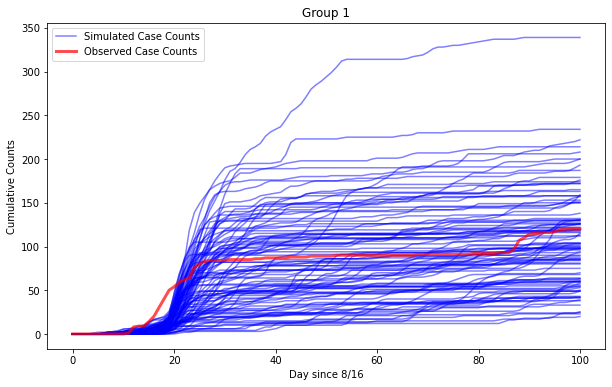

In [29]:
plot_trajectories(trajectories[0],actual_counts1,'Group 1')

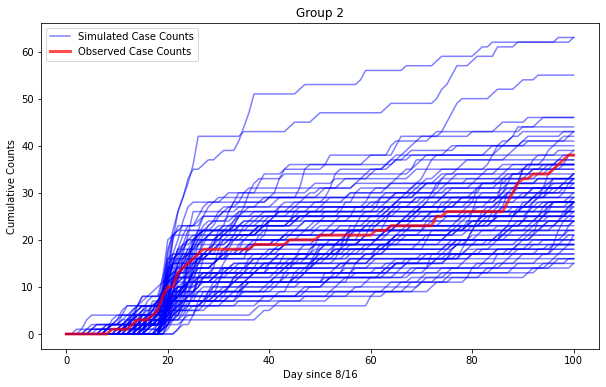

In [30]:
plot_trajectories(trajectories[1],actual_counts2,'Group 2')

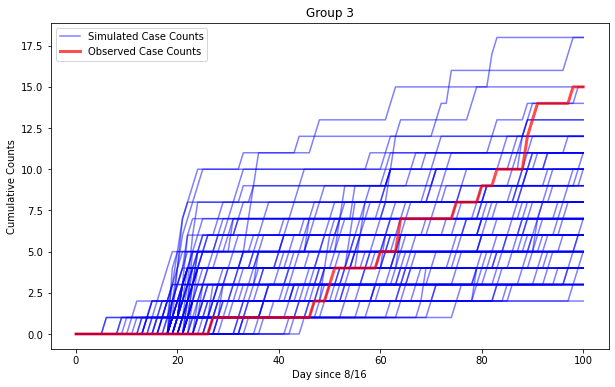

In [31]:
plot_trajectories(trajectories[2],actual_counts3,'Group 3')

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(len(actual_counts1)), actual_counts1, label = 'Group 1')
plt.plot(range(len(actual_counts2)), actual_counts2, label = 'Group 2')
plt.plot(range(len(actual_counts3)), actual_counts3, label = 'Group 3')
plt.legend()

plt.xlabel('Day Since 8/16')
plt.ylabel('Cumulative Case Counts')

In [ ]:
  for t in g1_trajectories:
        error = 0
        for a, b in zip(t, actual_counts1):
            error += (a-b)**2
        errors.append(error / len(t))

        
    for t in g2_trajectories:
        error = 0
        for a, b in zip(t, actual_counts2):
            error += (a-b)**2
        errors.append(error / len(t))

        
    for t in g3_trajectories:
        error = 0
        for a, b in zip(t, actual_counts3):
            error += (a-b)**2
        errors.append( error / len(t) )

    return np.mean(np.log(np.sqrt(errors)))